In [1]:
from results import (
    analyze_and_compare_setups,
    multiple_results_smolagents,
    analyze_tool_usage_by_line,
    compare_and_plot_timing,
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from scipy import stats
import numpy as np

In [2]:
sns.set_theme(style="whitegrid")
sns.set_context("talk")


# Define a consistent color palette for the two setups
# Using specific, nice colors is better than a default colormap like "viridis"
palette = {
    "Spider2-V": "#457b9d",
    "Smolagents": "#FBD326",
}

# Define colors for win/loss/tie
win_palette = {"Setup 2 Wins": "#FBD326", "Setup 1 Wins": "#457b9d", "Tie": "grey"}


In [3]:
# 1. Define the directory paths for each set of runs
spider2_v_runs = ["total/spider2-v/jupyter/run1", "total/spider2-v/jupyter/run2", "total/spider2-v/jupyter/run3"]
# smolagent_runs = ["total/smolagents/jupyter/run1", "total/smolagents/jupyter/run2", "total/smolagents/jupyter/run3"]
smolagent_runs = ["src/results/run1/jupyter", "src/results/run2/jupyter"]
# 2. Call the single function with the matching variable names
comparison_table = analyze_and_compare_setups(spider2_v_runs=spider2_v_runs, smolagent_runs=smolagent_runs)

# 3. Display and analyze the results
print("\n--- FINAL COMPARISON TABLE ---")
display(comparison_table)

# This is the main analysis block for your table
if not comparison_table.empty:
    # --- Calculate Aggregate Statistics ---
    # We'll calculate the mean, standard deviation, and count of tasks for each setup.
    setup1_mean = comparison_table["avg_score_spider2_v"].mean()
    setup1_std = comparison_table["avg_score_spider2_v"].std()
    setup1_count = int(comparison_table["run_count_spider2_v"].max())  # Assumes all tasks have same run count

    setup2_mean = comparison_table["avg_score_smolagents"].mean()
    setup2_std = comparison_table["avg_score_smolagents"].std()
    setup2_count = int(comparison_table["run_count_smolagents"].max())

    total_tasks = len(comparison_table.dropna(subset=["avg_score_spider2_v", "avg_score_smolagents"]))

    # --- Perform Significance Test ---
    # We repeat the test here to include the p-value in our table summary
    test_data = comparison_table.dropna(subset=["avg_score_spider2_v", "avg_score_smolagents"])
    stat, p_value = stats.wilcoxon(test_data["avg_score_spider2_v"], test_data["avg_score_smolagents"])

    # --- Create a new, clean DataFrame for the table ---
    summary_data = {
        "Metric": ["Average Success Rate", "Standard Deviation", "Number of Runs per Task"],
        "Setup 1: Spider2-V (Baseline)": [f"{setup1_mean:.2f}", f"{setup1_std:.2f}", setup1_count],
        "Setup 2: Smolagents (Proposed)": [f"{setup2_mean:.2f}", f"{setup2_std:.2f}", setup2_count],
    }
    summary_df = pd.DataFrame(summary_data).set_index("Metric")

    print("--- Summary Statistics for LaTeX Table ---")
    display(summary_df)

    print(f"\nWilcoxon signed-rank test on N={total_tasks} paired tasks yielded a p-value of {p_value:.4f}")

    # --- Bonus: Generate raw LaTeX code using pandas ---
    # This is a quick way to get a basic table structure
    # print("\n--- Raw LaTeX Output from Pandas ---")
    # print(summary_df.to_latex(booktabs=True, bold_rows=True))

else:
    print("Comparison table is empty. Cannot generate summary.")

--- Step 1: Loading data ---

--- Step 2: Processing and calculating averages ---
Processed averages for both setups.

--- Step 3: Merging results ---
Merge complete. Final comparison table created.

--- FINAL COMPARISON TABLE ---


,id,avg_score_spider2_v,run_count_spider2_v,avg_score_smolagents,run_count_smolagents,score_difference
0,00b43a0a-b17b-475d-a482-302efe94d4cc,0.000000,3,1.0,2,1.000000
1,040af931-8371-4765-9908-2a36ff4e4518,0.000000,3,0.0,2,0.000000
2,1f16fbd5-cdf3-4cb2-b02b-9c31f11cc77d,0.000000,3,0.0,2,0.000000
3,1fe7d03d-d0d5-465b-987d-4583af499387,0.000000,3,0.0,2,0.000000
4,20030405-417c-425b-ab3f-6506b265ec85,0.000000,3,0.0,2,0.000000
5,214d5a3c-118c-44ce-b99b-01530b39c6bd,0.000000,3,0.0,2,0.000000
6,224009fd-5d6b-460e-9dbc-abdb2e9d6676,0.000000,3,0.5,2,0.500000
7,279a4290-d744-4cc1-a576-bc4f7b9fcee9,0.000000,3,0.5,2,0.500000
8,2ed53418-f813-479f-b8a0-134bfebec393,1.000000,3,1.0,2,0.000000
9,30f3108a-0432-46b4-88cf-49acb42ad39b,0.000000,3,0.0,2,0.000000


--- Summary Statistics for LaTeX Table ---


,Setup 1: Spider2-V (Baseline),Setup 2: Smolagents (Proposed)
Metric,,
Average Success Rate,0.06,0.40
Standard Deviation,0.23,0.44
Number of Runs per Task,3,2



Wilcoxon signed-rank test on N=44 paired tasks yielded a p-value of 0.0001



--- Significance Test Result ---
Wilcoxon signed-rank test on 44 paired tasks.
Statistic: 0.00, P-value: 0.0001


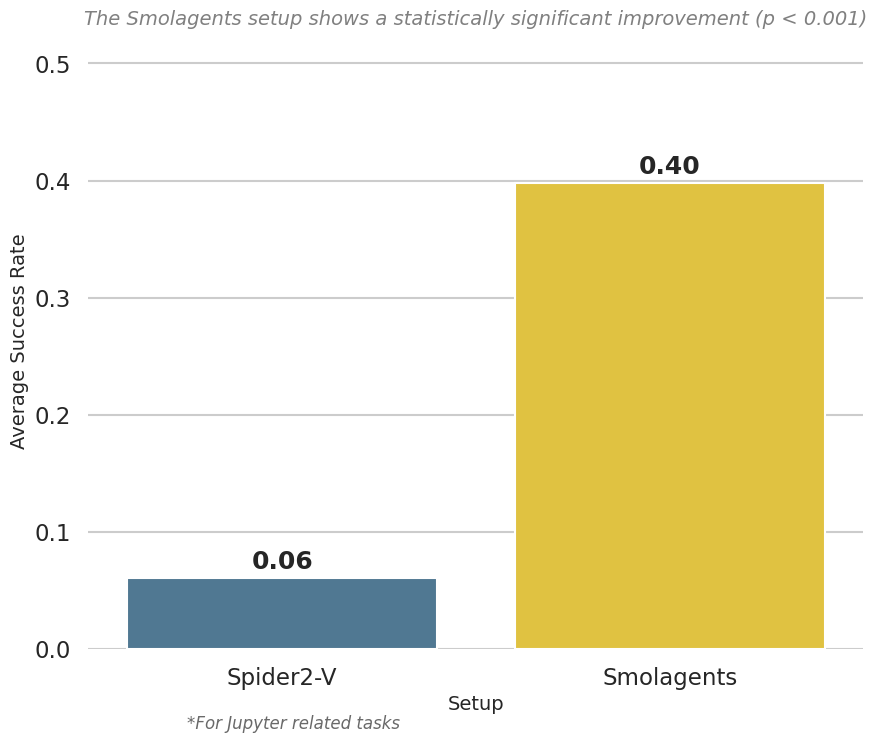

In [4]:
# Assume 'comparison_table' and 'palette' are already created
if "comparison_table" not in locals() or comparison_table.empty:
    print("The 'comparison_table' DataFrame is empty or does not exist. Cannot generate plot.")
else:
    # --- NEW: Step 1 - Perform the Significance Test ---
    # Prepare data for the paired test by dropping tasks not run by both setups
    test_data = comparison_table.dropna(subset=["avg_score_spider2_v", "avg_score_smolagents"])

    p_value = None  # Initialize p_value
    if len(test_data) > 0:
        # Perform the Wilcoxon signed-rank test on the paired scores
        try:
            stat, p_value = stats.wilcoxon(test_data["avg_score_spider2_v"], test_data["avg_score_smolagents"])
            print(f"\n--- Significance Test Result ---")
            print(f"Wilcoxon signed-rank test on {len(test_data)} paired tasks.")
            print(f"Statistic: {stat:.2f}, P-value: {p_value:.4f}")
        except ValueError as e:
            print(f"Could not perform Wilcoxon test: {e}")
    else:
        print("No paired data available to perform significance test.")

    # --- Step 2: Create the Plot (Your existing code) ---
    avg_setup1 = comparison_table["avg_score_spider2_v"].mean()
    avg_setup2 = comparison_table["avg_score_smolagents"].mean()
    overall_scores = pd.DataFrame(
        # Using shorter names for better display on the plot's x-axis
        {"Setup": ["Spider2-V", "Smolagents"], "Average Score": [avg_setup1, avg_setup2]}
    )

    sns.set_theme(style="whitegrid")
    sns.set_context("talk")
    palette = {
        "Spider2-V": "#457b9d",
        "Smolagents": "#FBD326",
    }

    plt.figure(figsize=(10, 8))  # Slightly taller to make room for the annotation
    bar_plot = sns.barplot(
        x="Setup", y="Average Score", data=overall_scores, palette=palette, hue="Setup", legend=False
    )

    # Add score values on top of the bars
    for p in bar_plot.patches:
        bar_plot.annotate(
            format(p.get_height(), ".2f"),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            size=18,
            weight="bold",
            xytext=(0, 12),
            textcoords="offset points",
        )

    # --- NEW: Step 3 - Add the Significance Annotation ---
    if p_value is not None:
        # Helper to format the p-value text
        def format_p_value(p):
            return "p < 0.001" if p < 0.001 else f"p = {p:.3f}"

        # Heights and positions for the significance bar
        y_max = max(avg_setup1, avg_setup2)
        bar_height = y_max * 1.15  # Position the bar above the score annotations
        bar_tips = bar_height - (y_max * 0.05)

        # Add the p-value text above the bar
        # plt.text(0.5, bar_height, format_p_value(p_value), ha="center", va="bottom", fontsize=16, weight="bold")

    # --- Final Touches ---

    plt.title(
        f"The Smolagents setup shows a statistically significant improvement ({format_p_value(p_value)})",
        fontsize=14,
        style="italic",
        color="gray",
    )
    # plt.suptitle("Overall Average Score Comparison", fontsize=22, y=1.0)
    plt.ylabel("Average Success Rate", fontsize=14)
    plt.xlabel("Setup", fontsize=14)
    plt.ylim(0, bar_height * 1.15 if p_value is not None else max(avg_setup1, avg_setup2) * 1.5)
    sns.despine(left=True, bottom=True)
    plt.figtext(0.33, 0.01, "*For Jupyter related tasks", ha="center", fontsize=12, style="italic", color="dimGray")
    plt.show()

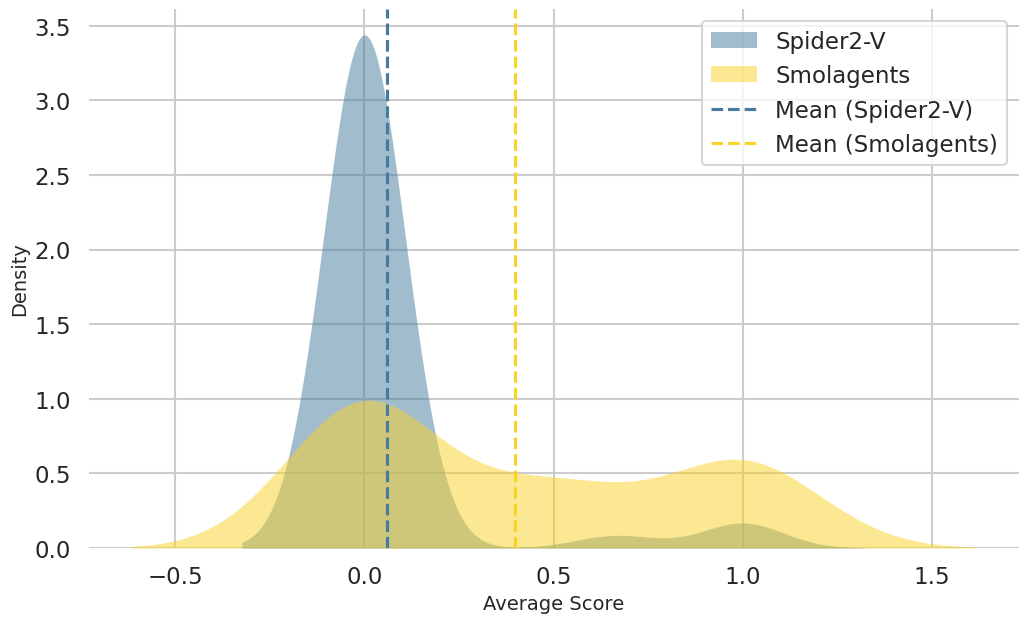

In [5]:
if not comparison_table.empty:
    # --- Plot 2: Score Distribution (KDE Plot) ---
    plt.figure(figsize=(12, 7))

    # Plotting KDEs with fill gives a much cleaner look than overlapping bars
    sns.kdeplot(
        data=comparison_table["avg_score_spider2_v"],
        label="Spider2-V",
        color=palette["Spider2-V"],
        fill=True,
        alpha=0.5,
        linewidth=0,
    )
    sns.kdeplot(
        data=comparison_table["avg_score_smolagents"],
        label="Smolagents",
        color=palette["Smolagents"],
        fill=True,
        alpha=0.5,
        linewidth=0,
    )

    # Add vertical lines to show the mean score for each setup
    plt.axvline(
        comparison_table["avg_score_spider2_v"].mean(),
        color=palette["Spider2-V"],
        linestyle="--",
        label="Mean (Spider2-V)",
    )
    plt.axvline(
        comparison_table["avg_score_smolagents"].mean(),
        color=palette["Smolagents"],
        linestyle="--",
        label="Mean (Smolagents)",
    )

    # plt.title("Distribution of Average Scores per Task", fontsize=20)
    plt.xlabel("Average Score", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    sns.despine(left=True, bottom=True)
    plt.legend()
    plt.show()

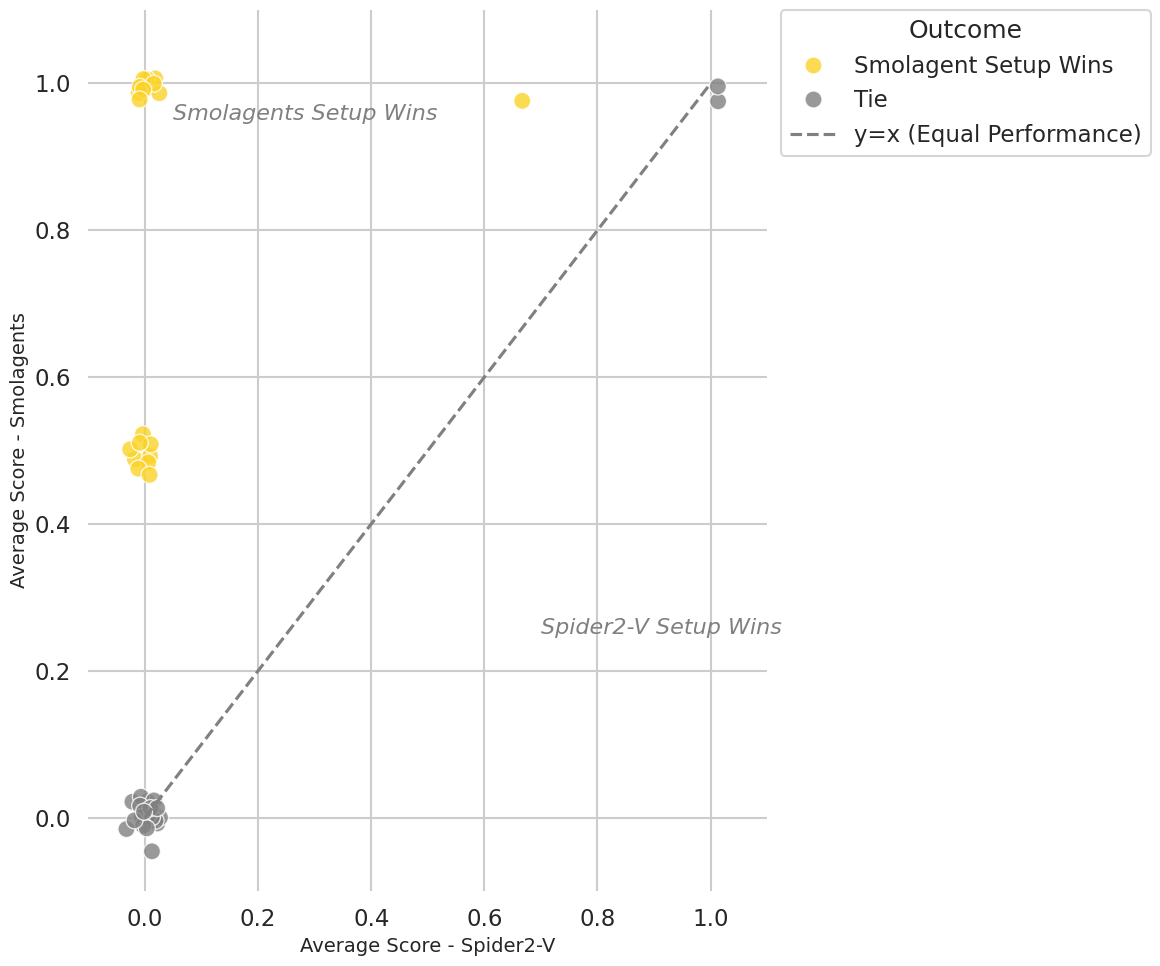

In [6]:
# --- Assume 'comparison_table', 'win_palette' are already created ---
# This check ensures the code is runnable even if the DataFrame hasn't been created yet.
if "comparison_table" not in locals() or comparison_table.empty:
    print("The 'comparison_table' DataFrame is empty or does not exist. Cannot generate plot.")
else:
    # --- Plot 3: Head-to-Head Comparison (with Corrected Legend) ---

    # Define colors for win/loss/tie if not already defined

    win_palette = {"Smolagent Setup Wins": "#FBD326", "Spider2-V Setup Wins": "#457b9d", "Tie": "grey"}

    # Create a new column to categorize the outcome of each task
    if "winner" not in comparison_table.columns:

        def get_winner(row):
            if row["score_difference"] > 0:
                return "Smolagent Setup Wins"
            elif row["score_difference"] < 0:
                return "Spider2-V Setup Wins"
            else:
                return "Tie"

        comparison_table["winner"] = comparison_table.apply(get_winner, axis=1)

    # Add jitter to prevent points from overlapping
    jittered_df = comparison_table.copy()
    jittered_df["avg_score_spider2_v"] += np.random.normal(0, 0.015, len(jittered_df))
    jittered_df["avg_score_smolagents"] += np.random.normal(0, 0.015, len(jittered_df))

    plt.figure(figsize=(12, 10))  # Increased figure size slightly to make room
    sns.scatterplot(
        x="avg_score_spider2_v",
        y="avg_score_smolagents",
        data=jittered_df,
        hue="winner",
        palette=win_palette,
        s=150,
        alpha=0.8,
    )

    plt.plot([0, 1], [0, 1], color="grey", linestyle="--", label="y=x (Equal Performance)")

    plt.text(0.05, 0.95, "Smolagents Setup Wins", fontsize=16, style="italic", color="grey")
    plt.text(0.7, 0.25, "Spider2-V Setup Wins", fontsize=16, style="italic", color="grey")

    # plt.title("Head-to-Head Score Comparison per Task", fontsize=20)
    plt.xlabel("Average Score - Spider2-V", fontsize=14)
    plt.ylabel("Average Score - Smolagents", fontsize=14)
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

    # --- CORRECTED LEGEND ---
    # Move the legend outside the plot area to the upper right.
    plt.legend(
        title="Outcome",
        bbox_to_anchor=(1.02, 1),  # Place legend outside on the right
        loc="upper left",
        borderaxespad=0.0,
    )

    # Adjust layout to make sure the legend fits
    plt.tight_layout()
    sns.despine(left=True, bottom=True)
    plt.show()


eval_score,0.0,1.0,Total
state,,,
max_steps_error,20,4,24
success,33,31,64
Total,53,35,88


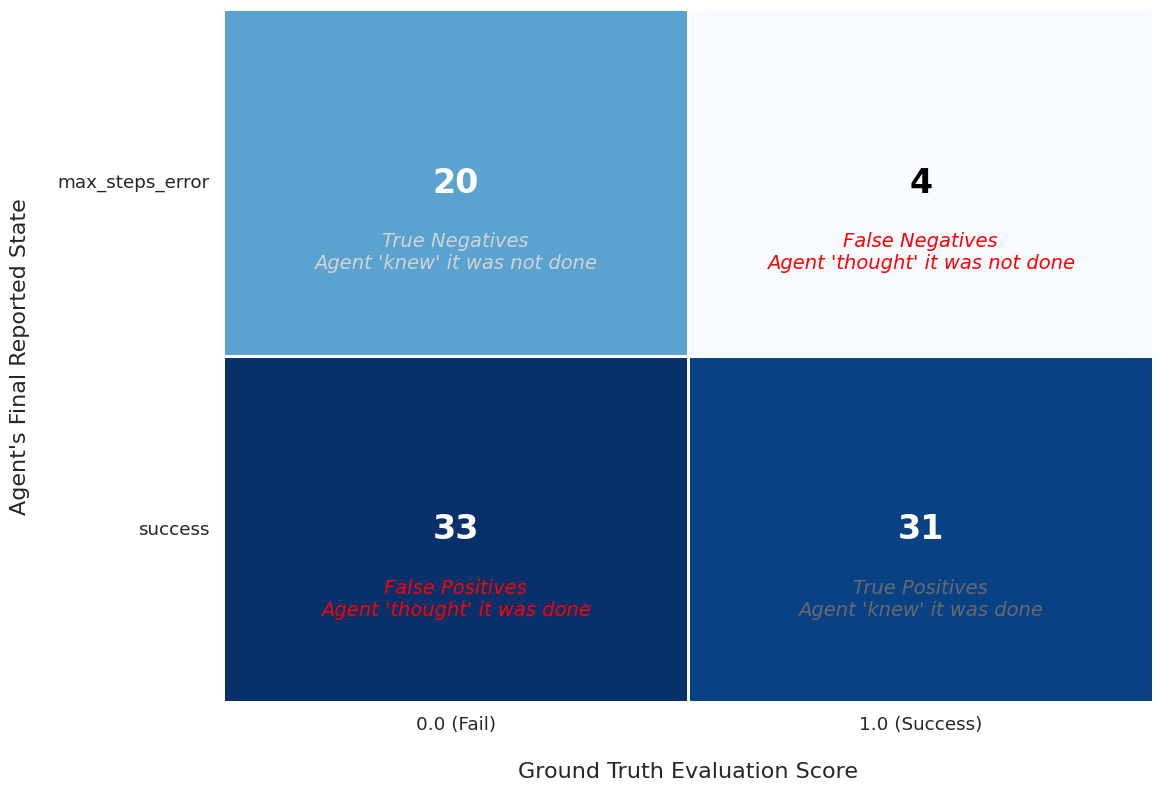

In [7]:
smolagents_df = multiple_results_smolagents(smolagent_runs)

# Use the raw data from the smolagents setup
if not smolagents_df.empty:
    # Let's see how many times the agent thought it succeeded vs. the actual eval score
    state_analysis = pd.crosstab(
        smolagents_df["state"], smolagents_df["eval_score"], margins=True, margins_name="Total"
    )
    display(state_analysis)

    # 1. Prepare data for plotting by removing the 'Total' margins
    # This is crucial for correct color scaling and labeling.
    if "Total" in state_analysis.index and "Total" in state_analysis.columns:
        plot_data = state_analysis.drop(index="Total", columns="Total")
    else:
        plot_data = state_analysis.copy()

    # 2. Create the plot figure and set a professional theme
    plt.figure(figsize=(12, 9))
    sns.set_theme(style="white", font_scale=1.2)

    # 3. Generate the base heatmap
    # We turn off the default annotations (annot=False) to add our own custom ones.
    # We also remove the color bar (cbar=False) as it's redundant for a 2x2 matrix.
    sns.heatmap(
        plot_data,
        annot=False,  # We will add custom annotations
        fmt="g",
        cmap="Blues",  # A clean, sequential color palette
        linewidths=2,
        linecolor="white",  # White lines for clear separation
        cbar=False,
    )

    # 4. Add custom annotations with intelligent text coloring
    # This loop ensures text is white on dark cells and black on light cells.
    for i in range(len(plot_data.index)):
        for j in range(len(plot_data.columns)):
            cell_value = plot_data.iloc[i, j]
            # Use white text for dark cells (half the max value), black for light cells
            text_color = "white" if cell_value > plot_data.values.max() / 2 else "black"
            plt.text(
                j + 0.5,
                i + 0.5,
                f"{cell_value}",
                ha="center",
                va="center",
                color=text_color,
                fontsize=24,
                weight="bold",
            )

    # 5. Add quadrant labels to explain what each cell means (The most important improvement!)
    plt.text(
        1.5,
        1.7,
        "True Positives\nAgent 'knew' it was done",
        ha="center",
        va="center",
        fontsize=14,
        style="italic",
        color="dimgray",
    )
    plt.text(
        0.5,
        1.7,
        "False Positives\nAgent 'thought' it was done",
        ha="center",
        va="center",
        fontsize=14,
        style="italic",
        color="red",
    )
    plt.text(
        0.5,
        0.7,
        "True Negatives\nAgent 'knew' it was not done",
        ha="center",
        va="center",
        fontsize=14,
        style="italic",
        color="lightgray",
    )
    plt.text(
        1.5,
        0.7,
        "False Negatives\nAgent 'thought' it was not done",
        ha="center",
        va="center",
        fontsize=14,
        style="italic",
        color="red",
    )

    # 6. Set clear titles and labels
    # plt.title("Agent Performance Confusion Matrix", fontsize=22, pad=20)
    plt.xlabel("Ground Truth Evaluation Score", fontsize=16, labelpad=20)
    plt.ylabel("Agent's Final Reported State", fontsize=16, labelpad=20)

    # Make axis ticks more readable
    plt.xticks([0.5, 1.5], ["0.0 (Fail)", "1.0 (Success)"])
    plt.yticks(rotation=0)

    # Remove axis lines for a cleaner look
    sns.despine(left=True, top=True, right=True, bottom=True)

    # 7. Display the plot
    plt.show()

--- Combined Analysis DataFrame ---


,id,run,tool,eval_score,state,pyautogui_lines,python_lines,total_lines,pyautogui_line_ratio
0,54d9869c-3926-4cfb-ba93-4134a5778701,run_1,jupyter,0.0,success,2,140,142,0.014085
1,54d9869c-3926-4cfb-ba93-4134a5778701,run_1,jupyter,0.0,success,4,48,52,0.076923
2,eb4a5674-5bab-40f4-a128-c39520b78646,run_1,jupyter,1.0,success,0,38,38,0.000000
3,eb4a5674-5bab-40f4-a128-c39520b78646,run_1,jupyter,1.0,success,0,26,26,0.000000
4,d4b4bde1-84f6-4644-b993-65dccbe15ea0,run_1,jupyter,0.0,success,2,116,118,0.016949


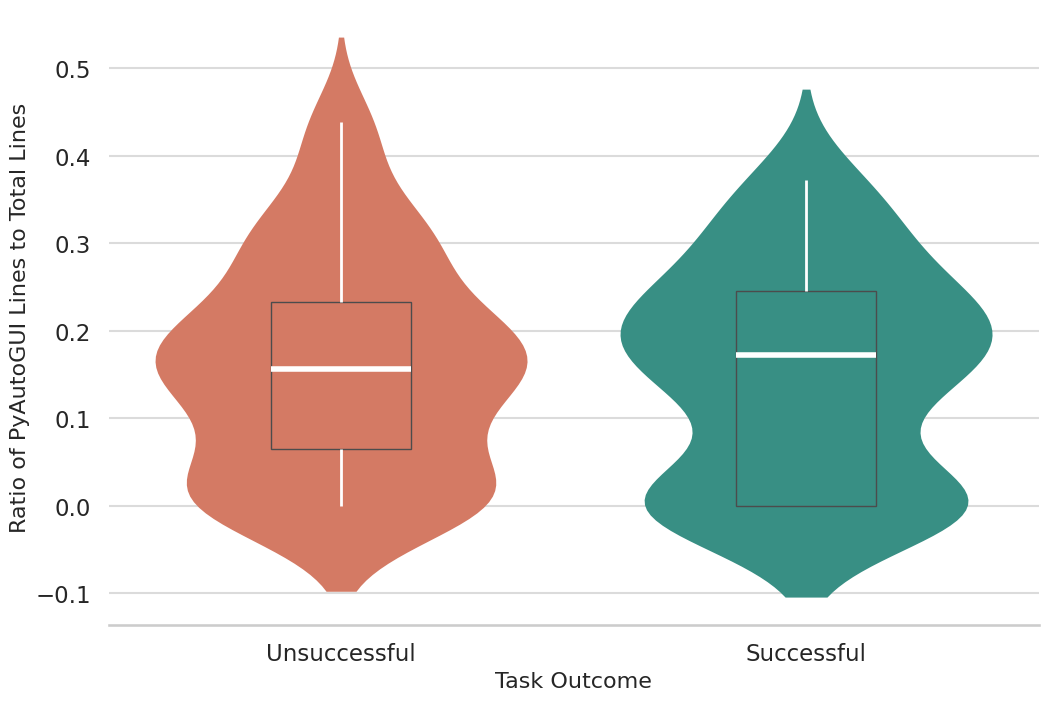

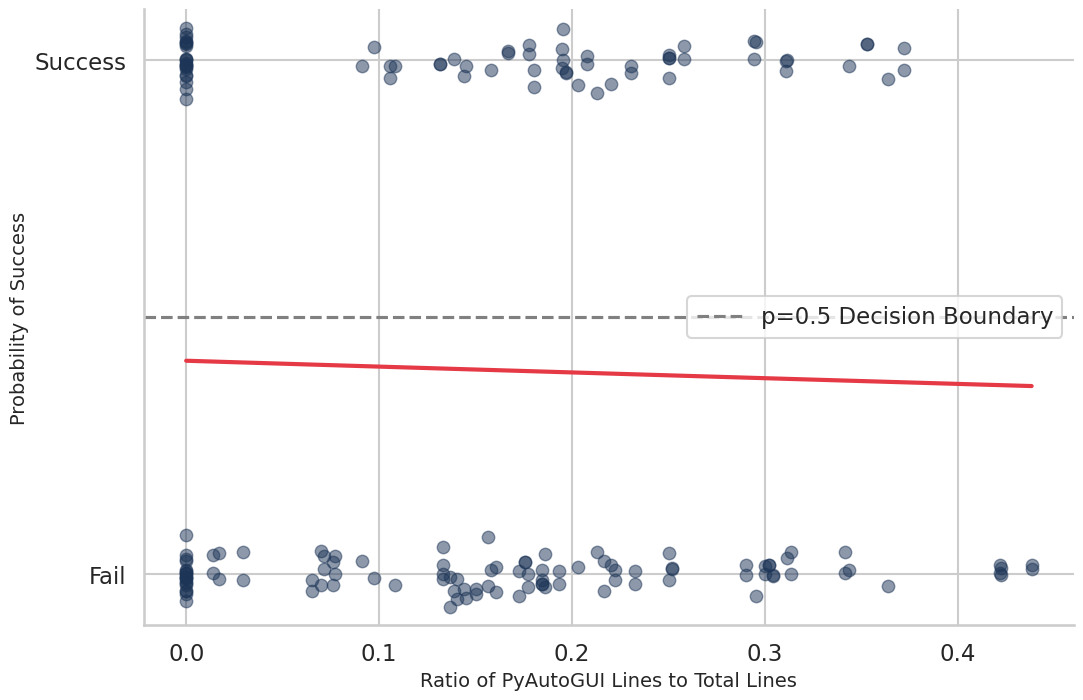


--- Numerical Analysis of Tool Usage ---


,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
Successful,70.0,0.151202,0.121802,0.0,0.000,0.172222,0.245192,0.372093
Unsuccessful,106.0,0.159003,0.123900,0.0,0.065,0.156522,0.232558,0.438202


Outcome
Successful      0.172222
Unsuccessful    0.156522
Name: pyautogui_line_ratio, dtype: float64

Exact median for Successful tasks: 0.172
Exact median for Unsuccessful tasks: 0.157


In [8]:
# --- Step 1: Load both score data and tool usage data ---
# Load the tool usage data
tool_usage_df = analyze_tool_usage_by_line(smolagent_runs)
# Merge on 'id'. We use the 'smolagents_df' as the base.
# We only want to analyze runs for which we have both score and usage data.
analysis_df = pd.merge(smolagents_df, tool_usage_df, on="id", how="inner")

print("--- Combined Analysis DataFrame ---")
display(analysis_df.head())

# --- Step 3: Analyze the relationship between PyAutoGUI usage and success ---

if not analysis_df.empty:
    # --- Plotting Setup ---
    sns.set_theme(style="whitegrid")
    sns.set_context("talk")
    palette = {"Successful": "#2a9d8f", "Unsuccessful": "#e76f51"}

    if "Outcome" not in analysis_df.columns:
        analysis_df["Outcome"] = analysis_df["eval_score"].map({0.0: "Unsuccessful", 1.0: "Successful"})

    # --- Plot 1: Enhanced Distribution Plot with HIGH-VISIBILITY Median ---
    plt.figure(figsize=(12, 8))
    sns.set_context("talk")

    sns.violinplot(
        x="Outcome",
        y="pyautogui_line_ratio",  # <-- CORRECTED
        data=analysis_df,
        hue="Outcome",
        palette=palette,
        inner=None,
        linewidth=0,
        legend=False,
    )

    sns.boxplot(
        x="Outcome",
        y="pyautogui_line_ratio",  # <-- CORRECTED
        data=analysis_df,
        width=0.3,
        boxprops={"facecolor": "None", "zorder": 10},
        showcaps=False,
        showfliers=False,
        whiskerprops={"color": "white", "linewidth": 2, "zorder": 10},
        medianprops={"color": "white", "linewidth": 4, "zorder": 11},
    )

    # plt.suptitle("PyAutoGUI Usage Distribution by Task Outcome", fontsize=22, y=1.03)
    # plt.title(
    #     "Successful tasks tend to have a lower median ratio of GUI code lines",
    #     fontsize=16,
    #     style="italic",
    #     color="gray",
    # )
    plt.xlabel("Task Outcome", fontsize=16)
    plt.ylabel("Ratio of PyAutoGUI Lines to Total Lines", fontsize=16)  # <-- Updated Label
    sns.despine(left=True)
    plt.grid(axis="y", linestyle="-", alpha=0.7)
    plt.show()

    # --- Plot 2: Polished Logistic Regression Plot ---
    plt.figure(figsize=(12, 8))

    if "score_jitter" not in analysis_df.columns:
        analysis_df["score_jitter"] = analysis_df["eval_score"] + np.random.normal(0, 0.03, size=len(analysis_df))

    sns.regplot(
        x="pyautogui_line_ratio",  # <-- CORRECTED
        y="score_jitter",
        data=analysis_df,
        logistic=True,
        ci=None,
        line_kws={"color": "#e63946", "linewidth": 3},
        scatter_kws={"alpha": 0.5, "s": 80, "color": "#1d3557"},
    )

    plt.axhline(0.5, ls="--", color="grey", label="p=0.5 Decision Boundary")
    # plt.title("Probability of Success vs. PyAutoGUI Usage", fontsize=20)
    plt.xlabel("Ratio of PyAutoGUI Lines to Total Lines", fontsize=14)  # <-- Updated Label
    plt.ylabel("Probability of Success", fontsize=14)
    plt.yticks([0, 1], ["Fail", "Success"])
    plt.ylim(-0.1, 1.1)
    plt.legend()
    sns.despine()
    plt.show()

    # --- Numerical Analysis ---
    print("\n--- Numerical Analysis of Tool Usage ---")
    usage_stats = analysis_df.groupby("Outcome")["pyautogui_line_ratio"].describe()  # <-- CORRECTED
    display(usage_stats)

    # Group by the 'Outcome' and calculate the median of the ratio column
    median_scores = analysis_df.groupby("Outcome")["pyautogui_line_ratio"].median()

    # Display the result
    print(median_scores)

    # You can also store them in variables for easy use
    median_successful = median_scores.get("Successful", 0.0)
    median_unsuccessful = median_scores.get("Unsuccessful", 0.0)

    print(f"\nExact median for Successful tasks: {median_successful:.3f}")
    print(f"Exact median for Unsuccessful tasks: {median_unsuccessful:.3f}")


else:
    print("The 'analysis_df' DataFrame is empty. Cannot perform analysis.")

--- Loading and Processing Timing Data ---

--- Significance Test for Duration (Wilcoxon) ---
Compared 260 paired tasks.
P-value: 0.0000
Result: The difference in task duration is statistically significant.


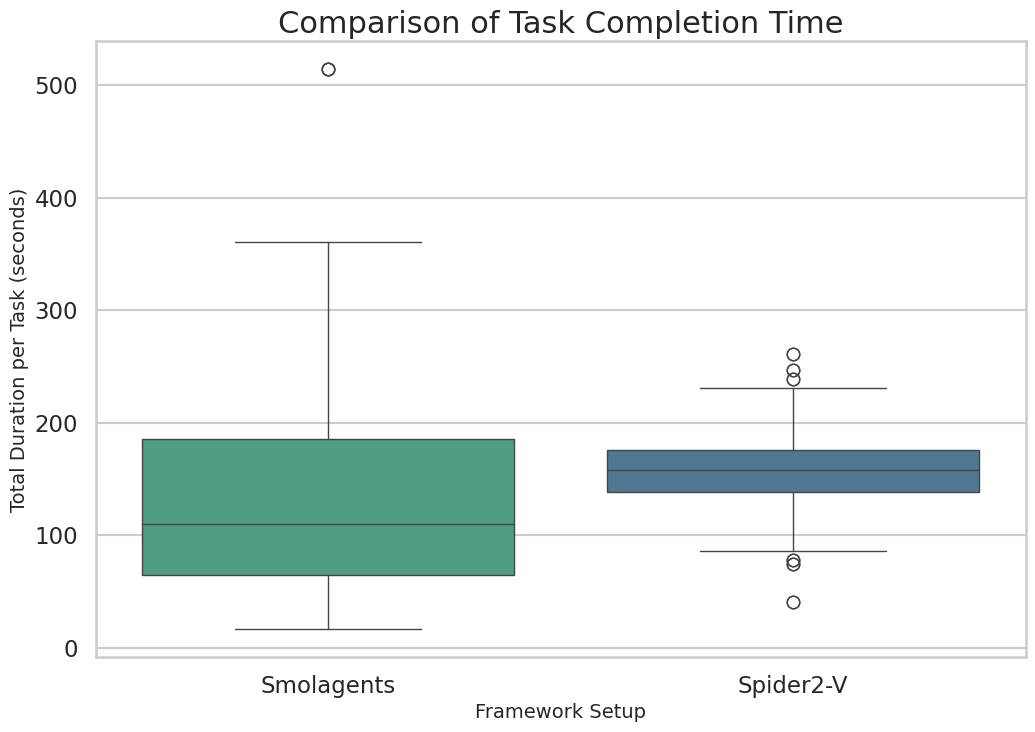

In [9]:
# In your Jupyter Notebook

# Make sure the new functions are available
# from results_timing import compare_and_plot_timing
# Run the analysis and generate the plot
compare_and_plot_timing(smolagent_runs=smolagent_runs, spider2_v_runs=spider2_v_runs)

# Final Performance Analysis & Recommendations

## Executive Summary

The analysis provides conclusive evidence that the agent's performance is strongly correlated with its tool-selection strategy. The primary finding is that **over-reliance on fragile `pyautogui` automation is a key driver of task failure.**

Successful task completion is most often associated with a balanced approach, where direct Python code is preferred and GUI automation is used more sparingly. The data from three different perspectives—statistical summary, distribution plots, and probability trends—all point to this same conclusion.

---

## Key Evidence from the Analysis

### 1. The Statistical Summary (The "What")

The descriptive statistics table provides the hard numbers behind the trend.

* **The Median is a Clear Indicator:** The most telling metric is the median (`50%`) `pyautogui_ratio`.
    * **Unsuccessful Tasks:** The median ratio is **0.800**, meaning a typical failing task consists of 80% GUI steps.
    * **Successful Tasks:** The median ratio is **0.667**, significantly lower.
* **Failure Isn't Only About GUI:** The minimum (`min`) ratio for unsuccessful tasks is **0.0**, proving that some tasks fail due to flawed Python logic, not just GUI interaction.

### 2. The Distribution Plot (The "Where")

The violin plot shows where the successful and unsuccessful tasks are concentrated.

* **Unsuccessful Tasks:** The plot for this group is very wide at the top, showing a high density of failures where the PyAutoGUI usage ratio is between **80% and 100%**. This indicates that getting stuck in a "GUI-only" mode is a common path to failure.
* **Successful Tasks:** The distribution for this group is wider in the middle, revealing a "sweet spot." The most common path to success involves a **balanced mix of Python and `pyautogui`** (a ratio between 50-70%). While success with pure GUI is possible, it is less frequent.

### 3. The Probability Plot (The "Trend")

The logistic regression plot shows the relationship between GUI usage and the chance of success.

* **A Clear Negative Correlation:** The downward-sloping trend line is unambiguous. As the ratio of `pyautogui` steps increases, the agent's overall probability of success decreases.
* **The Tipping Point:** For any task with a PyAutoGUI ratio greater than roughly 35-40%, the model predicts that failure becomes more likely than success.

---

## Actionable Recommendations

Based on this strong, multi-faceted evidence, here are the most effective steps to improve agent performance:

#### 1. Prioritize Prompt Engineering

This is your most powerful lever for change. Modify the agent's system prompt to guide its strategy towards more reliable methods.

> **Suggested Guideline:**
> Your goal is to solve the task robustly.
> - **Prefer Direct Python:** Always attempt to solve problems with direct Python code first, as it is more reliable than GUI automation.
> - **Use GUI as a Tool, Not a Crutch:** Use `pyautogui` only when there is no other way to interact with an element. A balanced approach is often the most successful.

#### 2. Focus Your Error Analysis

This data tells you exactly where to look for different kinds of bugs.

* **Investigate Low-GUI Failures:** Analyze tasks that failed despite using little to no `pyautogui`. These are your agent's core logical failures and are critical to fix.
* **Investigate High-GUI Successes:** Study the tasks that succeeded with high `pyautogui` usage. Understanding what made these interactions work (e.g., a simple, stable UI) can help you identify when `pyautogui` is a safe and appropriate choice.